# Información mutua

### Clasificación de eventos usando Información mutua como seleccionador de características.

-------------------------------------------------------------------------------------------------------------------------------

Alex Toro, Raquel Pezoa

## Librerias necesarias.
-------------------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


In [2]:
import winsound

## Lectura del set de datos reducido:

- El set original proviene de https://www.kaggle.com/competitions/higgs-boson/data.
- Separación de la variable Label de las demas variables.
-------------------------------------------------------------------------------------------------------------------------------

In [3]:
df = pd.read_csv("/Users/Alex/Downloads/Pre-procesado.csv")

In [4]:
# Entrene la división de prueba para evitar el sobreajuste
X_train = df.drop(labels=['Label'], axis=1)
y_train = df['Label']


In [5]:
X_train.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,85.123,5.111,45.454,139.856,-999.000,-999.000,-999.000,1.288,6.593,212.788,...,-2.521,327.124,1,145.787,-0.903,0.656,-999.000,-999.00,-999.000,145.787
1,70.751,16.532,47.178,107.916,4.446,442.881,-4.514,1.221,49.749,209.956,...,-1.118,326.261,3,58.119,-2.876,2.317,39.964,1.57,1.271,137.049
2,-999.000,79.211,77.286,0.998,-999.000,-999.000,-999.000,1.879,0.998,92.329,...,0.655,102.229,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
3,74.959,58.796,58.484,24.962,-999.000,-999.000,-999.000,2.628,24.962,57.390,...,1.663,84.495,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,-999.000,82.701,109.640,2.044,-999.000,-999.000,-999.000,2.674,2.044,62.347,...,0.508,110.727,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


### Entrega de los datos a la información mutua.
-------------------------------------------------------------------------------------------------------------------------------

In [6]:
mutual_info = mutual_info_classif(X_train, y_train, random_state=0)
mutual_info

array([0.16171893, 0.10500001, 0.0904143 , 0.03719009, 0.04070833,
       0.04226383, 0.04296986, 0.02007145, 0.01504836, 0.04415889,
       0.04490369, 0.04781482, 0.03132102, 0.0664899 , 0.00840278,
       0.00522772, 0.0159494 , 0.01498259, 0.00540088, 0.03309241,
       0.0020637 , 0.03603227, 0.02285896, 0.03536189, 0.033102  ,
       0.02279414, 0.02284608, 0.02846372, 0.02395066, 0.03353099])

### Convertir los datos a  una lista de duplas.

- Se convierte la matriz entregada por la información mutua junto a las columnas del dataframe en una lista de duplas.
- Se realizan las duplas para así poder reordenar las variables de la más relevante a la menos relevante.
- Se Reordena la duplas de mayor a menor.
- Se separan las duplas en listas separadas y transformar las 10 primeras en arreglos de numpy.
-------------------------------------------------------------------------------------------------------------------------------

In [7]:
l = []
for feature in zip(mutual_info,X_train.columns):
    l.append(feature)
l.sort(reverse=True)
l

[(0.16171893010796734, 'DER_mass_MMC'),
 (0.10500000919456887, 'DER_mass_transverse_met_lep'),
 (0.09041430203207867, 'DER_mass_vis'),
 (0.0664899013334046, 'PRI_tau_pt'),
 (0.047814816583069186, 'DER_met_phi_centrality'),
 (0.044903686952931565, 'DER_pt_ratio_lep_tau'),
 (0.044158893933802235, 'DER_sum_pt'),
 (0.04296985686949162, 'DER_prodeta_jet_jet'),
 (0.042263833243501026, 'DER_mass_jet_jet'),
 (0.040708330858473474, 'DER_deltaeta_jet_jet'),
 (0.03719009024701747, 'DER_pt_h'),
 (0.03603227424607436, 'PRI_met_sumet'),
 (0.035361890655789985, 'PRI_jet_leading_pt'),
 (0.033530992102519974, 'PRI_jet_all_pt'),
 (0.03310200223109172, 'PRI_jet_leading_eta'),
 (0.033092409344047446, 'PRI_met'),
 (0.031321015096531735, 'DER_lep_eta_centrality'),
 (0.028463722483667908, 'PRI_jet_subleading_eta'),
 (0.023950661849412302, 'PRI_jet_subleading_phi'),
 (0.022858961366750696, 'PRI_jet_num'),
 (0.022846078571565176, 'PRI_jet_subleading_pt'),
 (0.022794142088711666, 'PRI_jet_leading_phi'),
 (0.020

In [8]:
l_i = [] #lista de importancia
l_v = [] #lista de los nombres de las variables
for importance in range(len(l)):
    for var in range(len(l[importance])):
        if(var == 0):
            l_i.append(l[importance][var])
        else:
            l_v.append(l[importance][var])

In [9]:
import matplotlib.pyplot as plt
import numpy as np
y = np.array(l_i[0:10])
x = np.array(l_v[0:10])
x

array(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'PRI_tau_pt', 'DER_met_phi_centrality', 'DER_pt_ratio_lep_tau',
       'DER_sum_pt', 'DER_prodeta_jet_jet', 'DER_mass_jet_jet',
       'DER_deltaeta_jet_jet'], dtype='<U27')

### Graficación de las variables más importantes.

-------------------------------------------------------------------------------------------------------------------------------

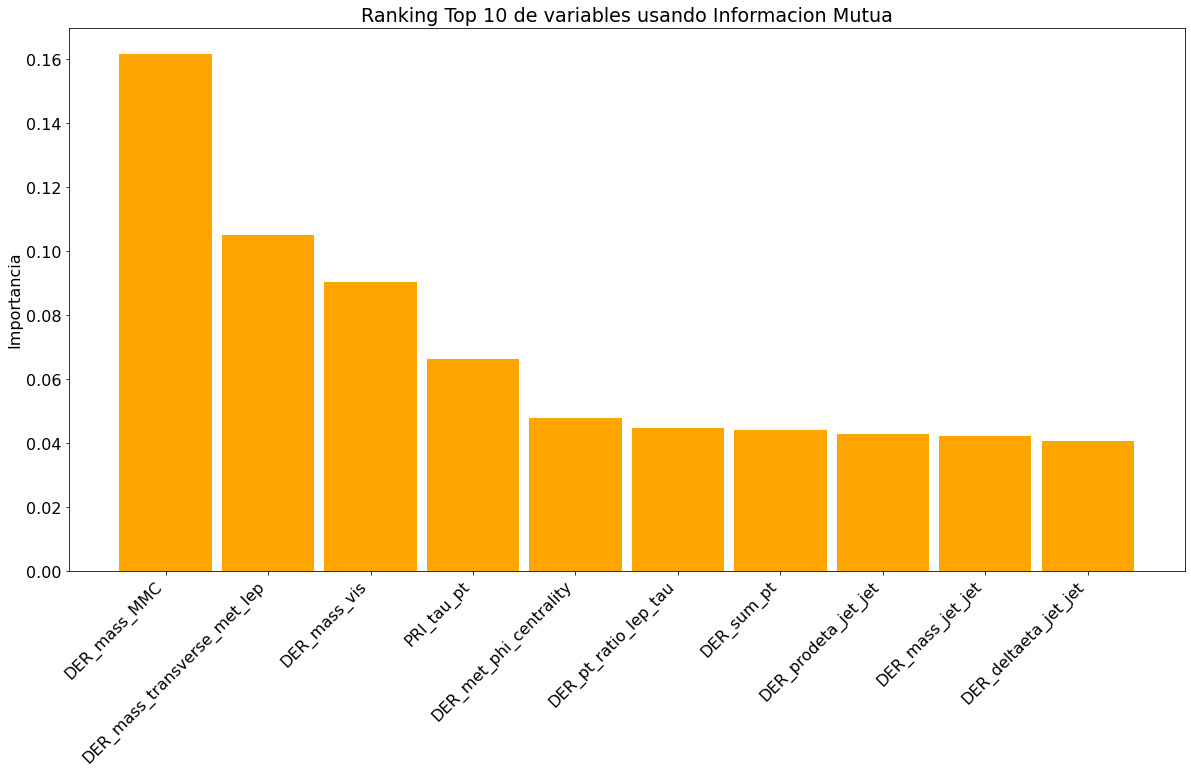

In [10]:
import matplotlib
font = {'size'   : 16}
matplotlib.rc('font', **font)
fig = plt.figure(figsize = (20, 10))


# creating the bar plot
plt.ylabel("Importancia")
plt.bar(x, y, color ='orange',
        width = 0.9)
plt.xticks(rotation=45, ha='right')
plt.title("Ranking Top 10 de variables usando Informacion Mutua")
plt.show()

In [11]:
import xgboost as xgb

### Entrenamiento, testeo y optimizacion de parametros de DMatrix de XGBoost con las variables entregadas por la información mutua.
-------------------------------------------------------------------------------------------------------------------------------

In [12]:
X_BestFeature = X_train[x] 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_BestFeature, y_train, test_size=0.2, random_state=0)


In [13]:
dtrain = xgb.DMatrix(X_train2, label=y_train2)
dtest = xgb.DMatrix(X_test2, label=y_test2)

In [14]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}
params['eval_metric'] = "mae"
num_boost_round = 999

In [15]:
modelo = xgb.train( 
    params, 
    dtrain, 
    num_boost_round=num_boost_round, 
    evals=[(dtest, "Test")], 
    early_stopping_rounds=10 
)

[15:52:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.42982
[1]	Test-mae:0.38002
[2]	Test-mae:0.34364
[3]	Test-mae:0.31706
[4]	Test-mae:0.29772
[5]	Test-mae:0.28356
[6]	Test-mae:0.27246
[7]	Test-mae:0.26471
[8]	Test-mae:0.25930
[9]	Test-mae:0.25529
[10]	Test-mae:0.25255
[11]	Test-mae:0.25111
[12]	Test-mae:0.24919
[13]	Test-mae:0.24819
[14]	Test-mae:0.24718
[15]	Test-mae:0.24677
[16]	Test-mae:0.24644
[17]	Test-mae:0.24641
[18]	Test-mae:0.24632
[19]	Test-mae:0.24609
[20]	Test-mae:0.24593
[21]	Test-mae:0.24577
[22]	Test-mae:0.24569
[23]	Test-mae:0.24549
[24]	Test-mae:0.24521
[25]	Test-mae:0.24511
[26]	Test-mae:0.24492
[27]	Test-mae:0.24470
[28]	Test-mae:0.24473
[29]	Test-mae:0.24461
[30]	Test-mae:0.24466
[31]	Test-mae:0.24438
[32]	Test-mae:0.24418
[33]	Test-mae:0.24398
[34]	Test-mae:0.24389
[35]	Test-mae:0.24378
[36]	Test-mae:0.24380
[37]	Test-mae:0.243

In [16]:
print("Best MAE: {:.2f} with {} rounds".format(
                 modelo.best_score,
                 modelo.best_iteration+1))

Best MAE: 0.24 with 51 rounds


In [17]:
cv_results = xgb.cv( 
    params, 
    dtrain, 
    num_boost_round=num_boost_round, 
    seed=42, 
    nfold=5, 
    metrics={'mae'}, 
    early_stopping_rounds=10 
)
cv_results

[15:52:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:52:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,0.428883,0.000289,0.429932,0.000445
1,0.377950,0.000523,0.379773,0.000851
2,0.340699,0.000748,0.343385,0.000849
3,0.313641,0.000716,0.317090,0.001207
4,0.293464,0.000890,0.297559,0.001567
5,0.278599,0.000675,0.283303,0.001783
6,0.267281,0.000970,0.272669,0.002167
7,0.258516,0.000911,0.264562,0.001914
8,0.252644,0.000772,0.259246,0.001944
9,0.248066,0.000938,0.255224,0.002123


In [18]:
cv_results['test-mae-mean'].min()

0.24341603096046643

In [19]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [20]:
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

CV with max_depth=9, min_child_weight=5
[16:55:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:55:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:55:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:55:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:55:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.24018374493400932 for 25 rounds
CV with max_depth=9, min_child_weigh

[16:56:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:56:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.23874233259361355 for 27 rounds
Best params: 10, 6, MAE: 0.23847137126404866


In [20]:
params['max_depth'] = 10
params['min_child_weight'] = 6

In [22]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [23]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

CV with subsample=1.0, colsample=1.0
[16:57:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:57:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:57:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:57:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:57:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.23847137126404866 for 22 rounds
CV with subsample=1.0, colsample=0.9
[1

[16:58:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:58:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.2399325976522731 for 19 rounds
CV with subsample=0.8, colsample=0.9
[16:58:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:58:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:58:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:58:07] WARNING: C:/Users/Administrat

In [21]:
params['subsample'] = 1.
params['colsample_bytree'] = 1.

In [25]:
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            metrics=['mae'],
            early_stopping_rounds=10
          )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

CV with eta=0.3
[16:59:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:59:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:59:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:59:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:59:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.23847137126404866 for 22 rounds

CV with eta=0.2
[16:59:09] WARNING: C:/Users/Administrator/

In [22]:
params['eta'] = .01

In [23]:
params

{'max_depth': 10,
 'min_child_weight': 6,
 'eta': 0.01,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'reg:linear',
 'eval_metric': 'mae'}

In [24]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[15:52:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.49746
[1]	Test-mae:0.49495
[2]	Test-mae:0.49246
[3]	Test-mae:0.48999
[4]	Test-mae:0.48755
[5]	Test-mae:0.48512
[6]	Test-mae:0.48274
[7]	Test-mae:0.48036
[8]	Test-mae:0.47802
[9]	Test-mae:0.47568
[10]	Test-mae:0.47338
[11]	Test-mae:0.47110
[12]	Test-mae:0.46885
[13]	Test-mae:0.46662
[14]	Test-mae:0.46441
[15]	Test-mae:0.46221
[16]	Test-mae:0.46003
[17]	Test-mae:0.45789
[18]	Test-mae:0.45576
[19]	Test-mae:0.45366
[20]	Test-mae:0.45159
[21]	Test-mae:0.44952
[22]	Test-mae:0.44748
[23]	Test-mae:0.44544
[24]	Test-mae:0.44342
[25]	Test-mae:0.44142
[26]	Test-mae:0.43947
[27]	Test-mae:0.43751
[28]	Test-mae:0.43559
[29]	Test-mae:0.43367
[30]	Test-mae:0.43177
[31]	Test-mae:0.42988
[32]	Test-mae:0.42802
[33]	Test-mae:0.42619
[34]	Test-mae:0.42436
[35]	Test-mae:0.42256
[36]	Test-mae:0.42077
[37]	Test-mae:0.419

[354]	Test-mae:0.24580
[355]	Test-mae:0.24573
[356]	Test-mae:0.24564
[357]	Test-mae:0.24557
[358]	Test-mae:0.24548
[359]	Test-mae:0.24539
[360]	Test-mae:0.24532
[361]	Test-mae:0.24522
[362]	Test-mae:0.24515
[363]	Test-mae:0.24508
[364]	Test-mae:0.24501
[365]	Test-mae:0.24492
[366]	Test-mae:0.24484
[367]	Test-mae:0.24477
[368]	Test-mae:0.24469
[369]	Test-mae:0.24462
[370]	Test-mae:0.24456
[371]	Test-mae:0.24449
[372]	Test-mae:0.24441
[373]	Test-mae:0.24434
[374]	Test-mae:0.24427
[375]	Test-mae:0.24420
[376]	Test-mae:0.24413
[377]	Test-mae:0.24406
[378]	Test-mae:0.24400
[379]	Test-mae:0.24393
[380]	Test-mae:0.24386
[381]	Test-mae:0.24378
[382]	Test-mae:0.24372
[383]	Test-mae:0.24365
[384]	Test-mae:0.24360
[385]	Test-mae:0.24353
[386]	Test-mae:0.24346
[387]	Test-mae:0.24340
[388]	Test-mae:0.24335
[389]	Test-mae:0.24328
[390]	Test-mae:0.24322
[391]	Test-mae:0.24315
[392]	Test-mae:0.24310
[393]	Test-mae:0.24304
[394]	Test-mae:0.24298
[395]	Test-mae:0.24292
[396]	Test-mae:0.24287
[397]	Test-

[711]	Test-mae:0.23741
[712]	Test-mae:0.23741
[713]	Test-mae:0.23740
[714]	Test-mae:0.23740
[715]	Test-mae:0.23740
[716]	Test-mae:0.23740
[717]	Test-mae:0.23739
[718]	Test-mae:0.23739
[719]	Test-mae:0.23739
[720]	Test-mae:0.23739
[721]	Test-mae:0.23738
[722]	Test-mae:0.23738
[723]	Test-mae:0.23738
[724]	Test-mae:0.23738
[725]	Test-mae:0.23737
[726]	Test-mae:0.23737
[727]	Test-mae:0.23737
[728]	Test-mae:0.23737
[729]	Test-mae:0.23737
[730]	Test-mae:0.23737
[731]	Test-mae:0.23736
[732]	Test-mae:0.23736
[733]	Test-mae:0.23735
[734]	Test-mae:0.23734
[735]	Test-mae:0.23734
[736]	Test-mae:0.23734
[737]	Test-mae:0.23734
[738]	Test-mae:0.23733
[739]	Test-mae:0.23732
[740]	Test-mae:0.23732
[741]	Test-mae:0.23732
[742]	Test-mae:0.23732
[743]	Test-mae:0.23731
[744]	Test-mae:0.23731
[745]	Test-mae:0.23731
[746]	Test-mae:0.23731
[747]	Test-mae:0.23730
[748]	Test-mae:0.23729
[749]	Test-mae:0.23728
[750]	Test-mae:0.23728
[751]	Test-mae:0.23728
[752]	Test-mae:0.23727
[753]	Test-mae:0.23726
[754]	Test-

In [25]:
um_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[15:53:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.49746
[1]	Test-mae:0.49495
[2]	Test-mae:0.49246
[3]	Test-mae:0.48999
[4]	Test-mae:0.48755
[5]	Test-mae:0.48512
[6]	Test-mae:0.48274
[7]	Test-mae:0.48036
[8]	Test-mae:0.47802
[9]	Test-mae:0.47568
[10]	Test-mae:0.47338
[11]	Test-mae:0.47110
[12]	Test-mae:0.46885
[13]	Test-mae:0.46662
[14]	Test-mae:0.46441
[15]	Test-mae:0.46221
[16]	Test-mae:0.46003
[17]	Test-mae:0.45789
[18]	Test-mae:0.45576
[19]	Test-mae:0.45366
[20]	Test-mae:0.45159
[21]	Test-mae:0.44952
[22]	Test-mae:0.44748
[23]	Test-mae:0.44544
[24]	Test-mae:0.44342
[25]	Test-mae:0.44142
[26]	Test-mae:0.43947
[27]	Test-mae:0.43751
[28]	Test-mae:0.43559
[29]	Test-mae:0.43367
[30]	Test-mae:0.43177
[31]	Test-mae:0.42988
[32]	Test-mae:0.42802
[33]	Test-mae:0.42619
[34]	Test-mae:0.42436
[35]	Test-mae:0.42256
[36]	Test-mae:0.42077
[37]	Test-mae:0.419

[710]	Test-mae:0.23741
[711]	Test-mae:0.23741
[712]	Test-mae:0.23741
[713]	Test-mae:0.23740
[714]	Test-mae:0.23740
[715]	Test-mae:0.23740
[716]	Test-mae:0.23740
[717]	Test-mae:0.23739
[718]	Test-mae:0.23739
[719]	Test-mae:0.23739
[720]	Test-mae:0.23739
[721]	Test-mae:0.23738
[722]	Test-mae:0.23738
[723]	Test-mae:0.23738
[724]	Test-mae:0.23738
[725]	Test-mae:0.23737
[726]	Test-mae:0.23737
[727]	Test-mae:0.23737
[728]	Test-mae:0.23737
[729]	Test-mae:0.23737
[730]	Test-mae:0.23737
[731]	Test-mae:0.23736
[732]	Test-mae:0.23736
[733]	Test-mae:0.23735
[734]	Test-mae:0.23734
[735]	Test-mae:0.23734
[736]	Test-mae:0.23734
[737]	Test-mae:0.23734
[738]	Test-mae:0.23733
[739]	Test-mae:0.23732
[740]	Test-mae:0.23732
[741]	Test-mae:0.23732
[742]	Test-mae:0.23732
[743]	Test-mae:0.23731
[744]	Test-mae:0.23731
[745]	Test-mae:0.23731
[746]	Test-mae:0.23731
[747]	Test-mae:0.23730
[748]	Test-mae:0.23729
[749]	Test-mae:0.23728
[750]	Test-mae:0.23728
[751]	Test-mae:0.23728
[752]	Test-mae:0.23727
[753]	Test-

In [26]:
mean_absolute_error(best_model.predict(dtest), y_test2)

0.23625138905164034

### Guardado del modelo y predicciones.
-------------------------------------------------------------------------------------------------------------------------------

In [27]:
best_model.save_model("Info_mutua.model")

In [14]:
loaded_model = xgb.Booster()
loaded_model.load_model("Info_mutua.model")
# And use it for predictions.
Prediccion = loaded_model.predict(dtest)

[12:06:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [15]:
Prediccion.min()

-0.10789198

In [16]:
Prediccion.max()

1.1460046

In [17]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, classification_report, roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay

In [18]:
testing_list =[]
for i in  np.linspace(0.1,0.9,9):
    d = {}
    y_p = Prediccion >= i
    print("Threshold:",i)
    cm = confusion_matrix(y_test2,y_p)
    d["th"] = i
    d["F1"] = np.round(f1_score(y_test2,y_p),2)
    d["Prec"] = np.round(precision_score(y_test2,y_p),2)
    d["Rec"] = np.round(recall_score(y_test2,y_p),2)
    d["Acc"] = np.round(accuracy_score(y_test2,y_p),2)
    d["RocAuc"] = np.round(roc_auc_score(y_test2,y_p),2)
    testing_list.append(d)

Threshold: 0.1
Threshold: 0.2
Threshold: 0.30000000000000004
Threshold: 0.4
Threshold: 0.5
Threshold: 0.6
Threshold: 0.7000000000000001
Threshold: 0.8
Threshold: 0.9


# Metricas para cada umbral.
- th: umbral
-------------------------------------------------------------------------------------------------------------------------------

In [19]:
testing_metrics_pd = pd.DataFrame(testing_list)
testing_metrics_pd

,th,F1,Prec,Rec,Acc,RocAuc
0,0.1,0.66,0.51,0.96,0.67,0.74
1,0.2,0.72,0.59,0.92,0.76,0.80
2,0.3,0.75,0.66,0.85,0.80,0.82
3,0.4,0.75,0.73,0.78,0.83,0.82
4,0.5,0.74,0.78,0.71,0.83,0.80
5,0.6,0.72,0.83,0.63,0.83,0.78
6,0.7,0.67,0.87,0.54,0.82,0.75
7,0.8,0.57,0.91,0.42,0.79,0.70
8,0.9,0.38,0.94,0.24,0.74,0.61


In [20]:
print(testing_metrics_pd.to_latex(index=False))

\begin{tabular}{rrrrrr}
\toprule
 th &   F1 &  Prec &  Rec &  Acc &  RocAuc \\
\midrule
0.1 & 0.66 &  0.51 & 0.96 & 0.67 &    0.74 \\
0.2 & 0.72 &  0.59 & 0.92 & 0.76 &    0.80 \\
0.3 & 0.75 &  0.66 & 0.85 & 0.80 &    0.82 \\
0.4 & 0.75 &  0.73 & 0.78 & 0.83 &    0.82 \\
0.5 & 0.74 &  0.78 & 0.71 & 0.83 &    0.80 \\
0.6 & 0.72 &  0.83 & 0.63 & 0.83 &    0.78 \\
0.7 & 0.67 &  0.87 & 0.54 & 0.82 &    0.75 \\
0.8 & 0.57 &  0.91 & 0.42 & 0.79 &    0.70 \\
0.9 & 0.38 &  0.94 & 0.24 & 0.74 &    0.61 \\
\bottomrule
\end{tabular}



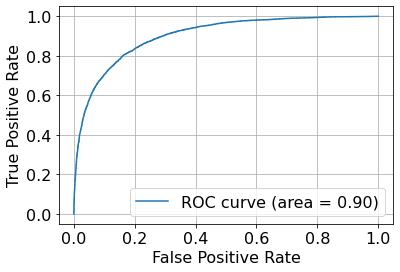

In [21]:
fpr, tpr, ths = roc_curve(y_test2,  Prediccion)
auc_ = auc(fpr, tpr)
plt.plot(fpr,tpr, label='ROC curve (area = %.2f)' %auc_)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.grid()
plt.show()

In [22]:
for i in  np.linspace(0.1,0.9,9):
    print(i)
    y_p = Prediccion >= i
    print(classification_report(y_test2, y_p))
    f1 = f1_score(y_test2, y_p)
    prec = precision_score(y_test2, y_p)
    rec = recall_score(y_test2, y_p)
    acc = accuracy_score(y_test2, y_p)
    cm=confusion_matrix(y_test2, y_p)
    print("Matriz de confusión: ")
    print(cm)
    print("----------------------------------------------------------")
    print("F1: %.2f" %f1 , " -- prec: %.2f" %prec, " -- recall: %.2f" %rec, " -- acc: %.2f" %acc)
    print("----------------------------------------------------------")

0.1
              precision    recall  f1-score   support

           0       0.97      0.52      0.68     13263
           1       0.51      0.96      0.66      6737

    accuracy                           0.67     20000
   macro avg       0.74      0.74      0.67     20000
weighted avg       0.81      0.67      0.67     20000

Matriz de confusión: 
[[6958 6305]
 [ 246 6491]]
----------------------------------------------------------
F1: 0.66  -- prec: 0.51  -- recall: 0.96  -- acc: 0.67
----------------------------------------------------------
0.2
              precision    recall  f1-score   support

           0       0.94      0.68      0.79     13263
           1       0.59      0.92      0.72      6737

    accuracy                           0.76     20000
   macro avg       0.77      0.80      0.75     20000
weighted avg       0.82      0.76      0.77     20000

Matriz de confusión: 
[[9003 4260]
 [ 566 6171]]
----------------------------------------------------------
F1: 0.72

In [42]:
umbral = 0.4

In [43]:
maskSignal=Prediccion>umbral

In [44]:
predicBin=[]
for i in maskSignal:
    if(i==True):
        predicBin.append(1)
    else:
        predicBin.append(0)

In [45]:
npPredict=np.array(predicBin)

In [46]:
cm=confusion_matrix(y_test2, npPredict)
cm

array([[11276,  1987],
       [ 1473,  5264]], dtype=int64)

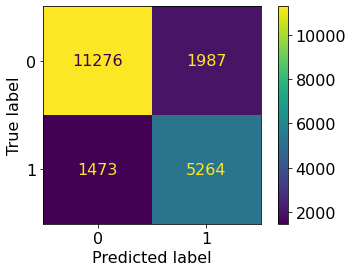

In [47]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [48]:
f1= f1_score(y_test2, npPredict)
f1

0.7526451243923363

In [30]:
prec=precision_score(y_test2, npPredict)
prec

0.7259688318852572

In [31]:
rec=recall_score(y_test2, npPredict)
rec

0.7813566869526496

In [32]:
accu=accuracy_score(y_test2, npPredict)
accu

0.827

In [33]:
print(classification_report(y_test2, npPredict))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87     13263
           1       0.73      0.78      0.75      6737

    accuracy                           0.83     20000
   macro avg       0.81      0.82      0.81     20000
weighted avg       0.83      0.83      0.83     20000



In [34]:
print("F1: %.2f" %f1 , " -- prec: %.2f" %prec, " -- recall: %.2f" %rec, " -- acc: %.2f" %acc)

F1: 0.75  -- prec: 0.73  -- recall: 0.78  -- acc: 0.74
